In [432]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve

sns.set(style = 'darkgrid')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [433]:
df=pd.read_csv('train_house.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
834,835,20,RL,75.0,7875,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,9,2008,WD,Normal,139950
262,263,80,RL,88.0,8471,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Normal,151000
1261,1262,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,128900
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [435]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [436]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [437]:
df.isnull().sum() / len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [438]:
df.duplicated().sum()

0

In [439]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Id,Id,0.000000
MSSubClass,MSSubClass,0.000000
MSZoning,MSZoning,0.000000
LotFrontage,LotFrontage,17.739726
LotArea,LotArea,0.000000
...,...,...
MoSold,MoSold,0.000000
YrSold,YrSold,0.000000
SaleType,SaleType,0.000000
SaleCondition,SaleCondition,0.000000


In [440]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

<AxesSubplot:>

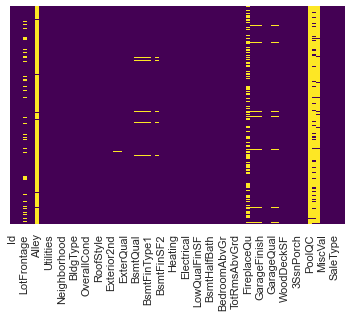

In [441]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [442]:
# Sob Nan value delete kore dewa hoiteche 

# df = df.dropna()
# df.isnull().sum()

In [443]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [444]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [445]:
a = df

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

LotFrontage 17.7397 % missing 
MasVnrArea 0.5479 % missing 
GarageYrBlt 5.5479 % missing 


In [446]:
#  LotFrontage eta te NAN value er ki obostha dekhbo 

df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [447]:
df["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [448]:
df['LotFrontage'].isnull().sum()

259

## Feature Engineering 

In [449]:
def cal(x):
    null_values=x.isnull().sum()
    count_values=x.value_counts().unique
    mean=x.mean()
    median=x.median()
    mode=x.mode()
    print('null_values: ',null_values,'count_values: ', count_values, 'mean: ',mean,'median: ', median,'mode: ',mode, sep=' \n  ' )
    return

In [450]:
x=a['LotFrontage']
cal(x)

# ekhane - mean:70.04995836802665 , median: 69.0 , mode:0 , 60.0 
# Sobcheye besi marks ache Mean e so ei Column mean diye korte hobe .


null_values:  
  259 
  count_values:  
  <bound method Series.unique of 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64> 
  mean:  
  70.04995836802665 
  median:  
  69.0 
  mode:  
  0    60.0
dtype: float64


In [451]:
# Fill Missing Values
# Mean Avg of this Column 

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [452]:
df['Alley'].isnull().sum()

1369

In [453]:
# drop
df.drop(['Alley'],axis=1,inplace=True)

In [454]:
df.columns[df.isnull().any()]

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [455]:
df['MasVnrType'].isnull().sum()

8

In [456]:
df['MasVnrArea'].isnull().sum()

8

### Jokhon Column patern Int na hoye Object hobe tokhon kono kotha chara MODE use korte hobe

In [457]:
# x=a['MasVnrType'] 
# cal(x)
# era Object variable So ei popeline diye kaj korbe na.

df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [458]:
df['BsmtQual'].isnull().sum()

37

In [459]:
df['BsmtCond'].isnull().sum()

37

In [460]:
df['BsmtExposure'].isnull().sum()

38

In [461]:
# Jei Element ta Ei COlumn e Sob cheye besi ache 

df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [462]:
df['BsmtFinType1'].isnull().sum()

37

In [463]:
df['BsmtFinType2'].isnull().sum()

38

In [464]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [465]:
df["BsmtFinType1"].unique() 

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [466]:
df.columns[df.isnull().any()]

Index(['Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [467]:
df['Electrical'].isnull().sum()

1

In [468]:
df['FireplaceQu'].isnull().sum()

690

In [469]:
df['GarageType'].isnull().sum()

81

In [470]:
df['PoolQC'].isnull().sum()

1453

In [471]:
df['Fence'].isnull().sum()

1179

In [472]:
df['MiscFeature'].isnull().sum()

1406

In [473]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [474]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [475]:
df.drop(['Id'],axis=1,inplace=True)

In [476]:
df.columns[df.isnull().any()]

Index(['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')

In [477]:
df['GarageYrBlt'].isnull().sum()

81

In [478]:
x=a['GarageYrBlt'] 
cal(x)

null_values:  
  81 
  count_values:  
  <bound method Series.unique of 2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64> 
  mean:  
  1978.5061638868744 
  median:  
  1980.0 
  mode:  
  0    2005.0
dtype: float64


In [479]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [480]:
df['GarageFinish'].isnull().sum()

81

In [481]:
df['GarageQual'].isnull().sum()

81

In [482]:
df['GarageCond'].isnull().sum()

81

In [483]:
df['GarageYrBlt'].isnull().sum()

81

In [484]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [485]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [486]:
df.columns[df.isnull().any()]

Index([], dtype='object')

<AxesSubplot:>

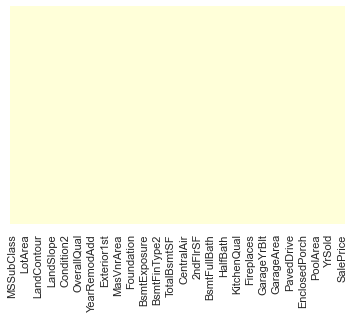

In [487]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [488]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [489]:
df.shape

(1460, 76)

In [490]:
##HAndle Categorical Features

In [491]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [492]:
len(columns)

39

In [493]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [494]:
main_df=df.copy()

# Combine Test Data 

In [495]:
test_df=pd.read_csv('formulatedtest.csv')
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [496]:
test_df.shape

(1459, 74)

In [497]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [498]:
final_df=pd.concat([df,test_df],axis=0)

In [499]:
final_df.shape

(2919, 76)

In [500]:
final_df.columns[final_df.isnull().any()]

Index(['GarageYrBlt', 'SalePrice'], dtype='object')

In [501]:
final_df.drop(['GarageYrBlt'],axis=1,inplace=True)
#final_df.drop(['SalePrice'],axis=1,inplace=True)

In [502]:
final_df.columns[final_df.isnull().any()]

Index(['SalePrice'], dtype='object')

<AxesSubplot:>

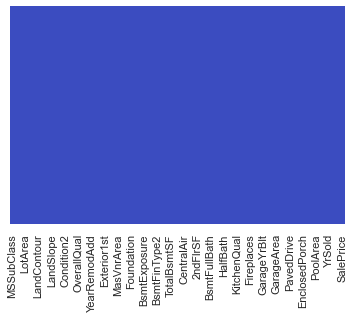

In [503]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [504]:
final_df.shape

(2919, 75)

In [505]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [506]:
final_df.shape

(2919, 236)

# Remove Dublicate Column

In [512]:
#  Remove Dublicate Column

final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [513]:
final_df.shape

(2919, 176)

In [521]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [522]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Prediciton and selecting the Algorithm

In [525]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [527]:
y_pred=classifier.predict(df_Test)
y_pred

ValueError: Feature shape mismatch, expected: 175, got 176